In [1]:
from gensim.models import LdaModel
import pandas as pd
from gensim.corpora import Dictionary
from gensim import corpora, models
import csv
rawdata = pd.read_csv('./dataset/toutiao/DMSC.csv',low_memory=False)
rawdata = rawdata[rawdata['Movie_Name_CN']=='大圣归来']
rawdata=rawdata[['Star','Comment']]
rawdata['Star'][rawdata['Star']<=2 ]=0
rawdata['Star'][rawdata['Star']>=3 ]=1
print('均匀样本前\n',rawdata.Star.value_counts())
class_num=len(rawdata[rawdata['Star']==0])
data=pd.concat([rawdata[rawdata['Star']==1].sample(class_num),rawdata[rawdata['Star']==0]]).sample(2*class_num)
data.index=range(2*class_num)
print('均匀样本后\n',data.Star.value_counts())

均匀样本前
 1    127547
0      5846
Name: Star, dtype: int64
均匀样本后
 1    5846
0    5846
Name: Star, dtype: int64


/tmp/ipykernel_3411837/1218118473.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata['Star'][rawdata['Star']>=3 ]=1


In [2]:
good=data[data['Star']==1]
bad=data[data['Star']==0]

[['没看出来评价这么好', '短腿妖猴', '本来想给3星', '为了拉低正确率给2星吧'], ['结尾什么鬼，太仓促了。前面挺好的。//对了，我多评价：还行。'], ['还是太过老套，情节过于简单，几句脏话竟是全片唯一的亮点。'], ['只能说不是我的菜。故事上真是太弱了'], ['别看'], ['顶多是个展示动画制作的Demo，剧情没有起伏算什么电影。'], ['妖王如此装逼，毛毛虫如此牛逼，老槐树表示不服'], ['怎么没有零星这个选项，称得上国产动画标杆儿之作'], ['所有一切....并没有。'], ['抛开3D特效剧情价值观什么的统统不说，单纯看不下去，只能给这个分了'], ['老子只想说，营销手段做得好。'], ['电影本身2星只能说比一帮国产垃圾好些，苦情营销和“自费水军”太恶心人减1星'], ['我TM。。。看了3次开头，都没兴趣看下去。。。不好意思了'], ['如果没有那么多人给满分，我觉得电影也是可以一看。起码我买票去看了，但是好多评论吹得太厉害，让我觉得发行方是不是很诚实有个问题，这些满分哪里来的？真有那么好么？故事几乎与西游记没有关系，干嘛顶它的名头，这么厉害，自己写个故事拍不就完了？'], ['太水了，根本没剧情。。。。白龙一会出来一次是干嘛呢？老和尚功夫不错啊，背景也不交代一下。笑点太低。为什么要抓童男童女啊？祭祀毛线啊？音乐不配套，感觉强加上去的。老猪你干嘛一出场在寺庙里办弥勒佛？卧槽看得一愣一愣的。。。整部电影就开头结尾的打斗好看。一星不再多'], ['吹得什么一样～回去卖情怀吧～'], ['适合小孩子看'], ['慕名而看，但太幼稚，欣赏不动，一堆莫名其妙毫无逻辑的剧情，实在看不完~'], ['支持国产，也只能给一星了'], ['动画制作很棒，但配乐太烂！'], ['反正我看的第一反应是拖沓节奏慢，不合时宜炫炫动画，很厉害了'], ['影评说秒杀超能陆战队，所以就带老婆儿子去看，打分比捉妖记还高。结束后老婆第一句话就是：这就是你说的很好看的电影？我很无语，超能陆战队我愿意再看一次，这个不会。水彩画和音乐我不懂，打5分说这些的都是艺术家。剧情很无聊.亮点预告片都有（如果算亮点的话）36块钱一张票3个人108，真心不值得。'], ['感情部分想渲染但是又渲染不到位，所以显得很生硬，结尾又太突然，总感觉太僵硬，跟日本动画还是差很多啊'

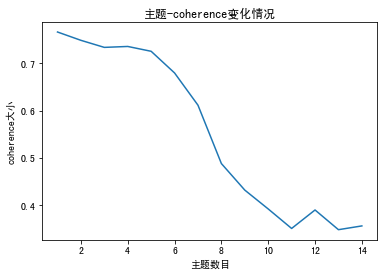

In [3]:
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
 
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
 
file_object2=bad.Comment.values
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
print(data_set)
 
 
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
#Lda = gensim.models.ldamodel.LdaModel  # 创建LDA对象
 
#计算困惑度
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)
 
#计算coherence
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=data_set, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()
 
# 绘制困惑度折线图
x = range(1,15)
# z = [perplexity(i) for i in x]
y = [coherence(i) for i in x]
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-coherence变化情况')
plt.show()

In [4]:
# 准备数据
 
file_object2= bad.Comment.values
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
 
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes = 30,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
print(result_list)

[(0, '0.002*"唉" + 0.002*"失望" + 0.001*"剧情" + 0.001*"剧情不行" + 0.001*"什么鬼" + 0.001*"浪费时间" + 0.001*"……" + 0.001*"盛名之下" + 0.001*"还可以" + 0.001*"差评！"'), (1, '0.006*"垃圾" + 0.004*"不好看" + 0.003*"水军太多" + 0.001*"=" + 0.001*"with" + 0.001*"一般吧" + 0.001*"大圣归来" + 0.001*"恶心" + 0.001*"画面还行吧" + 0.001*"剧情不仅弱"'), (2, '0.002*"不喜欢" + 0.002*"烂片" + 0.002*"无聊" + 0.002*"一般" + 0.001*"剧情一般" + 0.001*"2015" + 0.001*"烂" + 0.001*"剧情负分" + 0.001*"完全看不下去" + 0.001*"没啥意思"'), (3, '0.006*"呵呵" + 0.003*"。" + 0.002*"剧情太弱" + 0.002*"睡着了" + 0.001*"被骗了" + 0.001*"难看" + 0.001*"栀子花开" + 0.001*"自来水" + 0.001*"渣" + 0.001*"差"'), (4, '0.001*"剧情是硬伤" + 0.001*"很一般" + 0.001*"无感" + 0.001*"没看完" + 0.001*"剧情单薄" + 0.001*"…" + 0.001*"看睡着了" + 0.001*"但是" + 0.001*"我是水军" + 0.001*"好失望"')]
[1, 0, 3, 0, 4, 3, 4, 4, 1, 1, 0, 2, 2, 4, 3, 1, 3, 4, 4, 4, 1, 2, 1, 3, 2, 3, 4, 4, 2, 1, 0, 0, 0, 3, 3, 4, 4, 1, 4, 3, 3, 3, 3, 1, 1, 4, 3, 3, 1, 1, 0, 3, 2, 0, 3, 3, 2, 3, 1, 1, 1, 2, 4, 4, 4, 1, 1, 3, 0, 4, 4, 3, 1, 0, 0, 1, 1, 3, 2, 3, 0, 1, 1, 1, 1, 1, 0, 4, 4, 0, 

In [5]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(data, './topic1.html')